In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as ml
from Savitzky_Golay_Filter import savitzky_golay
%matplotlib inline

In [2]:
df = pd.read_csv('../other/frac_merge_peak.csv')
df.shape

(178, 46)

In [3]:
df.columns

Index([u'PropID', u'RSID', u'End_Date', u'Reservoir', u'Completed_Feet',
       u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing',
       u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster',
       u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster',
       u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate',
       u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure',
       u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', u'PROPNUM', u'XEC_FIELD',
       u'OPERATOR', u'COUNTY', u'STATE', u'M_LATITUDE', u'M_LONGITUDE',
       u'MAJOR', u'SPUD_DATE', u'FIRST_PROD', u'Wet_Gas_EUR', u'Dry_Gas_EUR',
       u'Oil_EUR', u'NGL_EUR', u'Days_Production', u'OIL_Peak',
       u'OIL_Days_to_Peak'],
      dtype='object')

In [4]:
df[[u'PROPNUM', u'Days_Production', u'OIL_Peak', u'OIL_Days_to_Peak']]

,PROPNUM,Days_Production,OIL_Peak,OIL_Days_to_Peak
0,L28IBM1H37,2459,362.873919,28
1,L92IE49R74,2250,407.804682,26
2,LC1JGIXOQC,2168,229.223976,6
3,LC1JPOMGSC,2164,65.190348,6
4,LCAGG2VS2Z,2138,102.260760,27
5,M13MJ1994Y,2122,151.306133,15
6,M22J6KLHGW,2099,371.124036,11
7,M3EKTLUE4G,2049,217.689458,24
8,M83J2IWUGT,1929,321.399619,7
9,M6UG6HD03V,1932,391.252140,15


In [5]:
def plot_production(propnum, df, window=31, poly=5):
    y_oil = df[df['PROPNUM'] == propnum]['OIL'].reset_index(drop=True)
    y_gas = df[df['PROPNUM'] == propnum]['GAS'].reset_index(drop=True)
    y_water = df[df['PROPNUM'] == propnum]['WATER'].reset_index(drop=True)
    x = range(len(y_oil))
    y_oil_smooth = savitzky_golay(y_oil.values, window, poly)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y_oil, label='Oil', color='green')
    ax.plot(x, y_gas, label='Gas', color='red')
    ax.plot(x, y_water, label='Water', color='blue')
    plt.legend(fontsize=18)
    ax.plot(x, y_oil_smooth, color='green', linestyle='--')
    ax.scatter(y_oil_smooth.argmax(), y_oil_smooth.max(), marker='x', s=200, color='black')
    ax.annotate('Peak', (y_oil_smooth.argmax(), y_oil_smooth.max()), xytext=(y_oil_smooth.argmax() + 5, y_oil_smooth.max() + 500), arrowprops=dict(arrowstyle="->"), size=18)
    ax.set_title('Well Production', fontsize=36)
    ax.set_xlabel('Days On', fontsize=24)
    ax.set_ylabel('Production (bbl, mcf)', fontsize=24)
    ax.set_xlim([0, len(y_oil)])
    ax.set_ylim([0, 8000])
    font_size = 18
    font_name = 'sans'
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
        tick.label.set_fontname(font_name)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
        tick.label.set_fontname(font_name)

In [130]:
    df_daily = pd.read_excel('../other/AC_DAILY.xlsx')
    cols = df_daily.columns.tolist()
    cols = [col.replace(' ', '_') for col in cols]
    df_daily.columns = cols

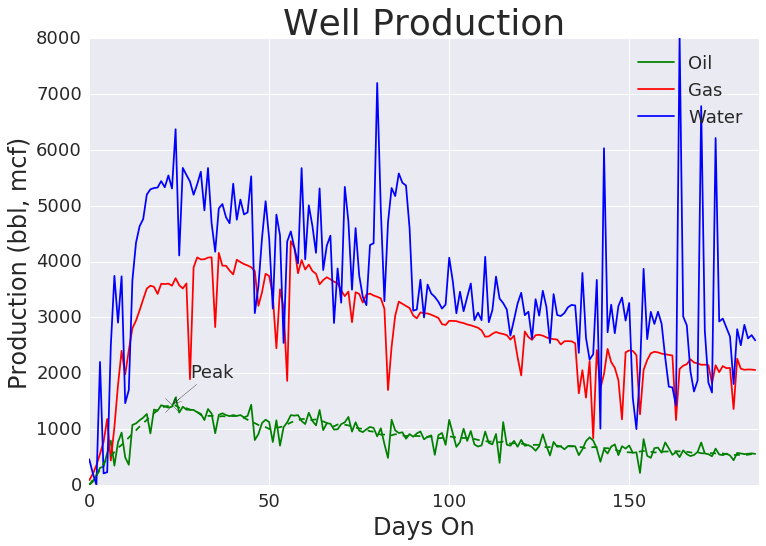

In [152]:
# import seaborn
plot_production('R4CFHPPP1K', df_daily) # presentation example
# plt.savefig('../other/figures/production_plot', dpi=400)

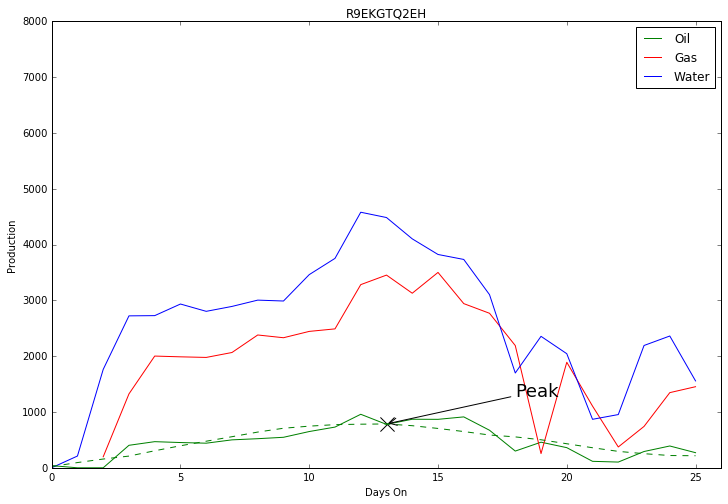

In [7]:
plot_production('R9EKGTQ2EH', df_daily) # 26 days production

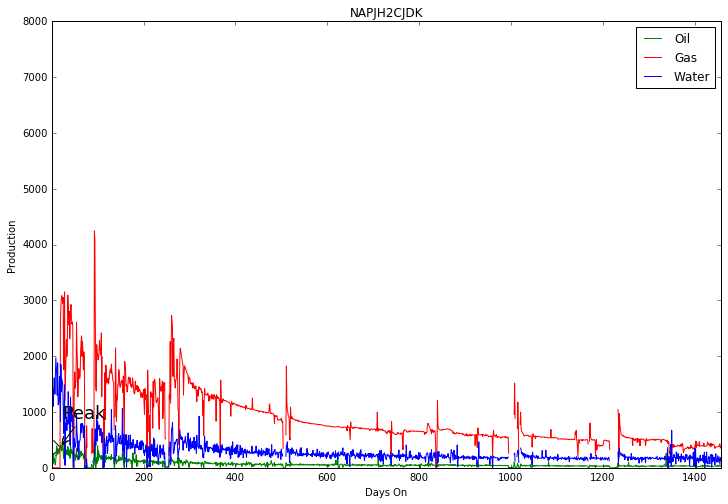

In [8]:
plot_production('NAPJH2CJDK', df_daily) # 1458 days production

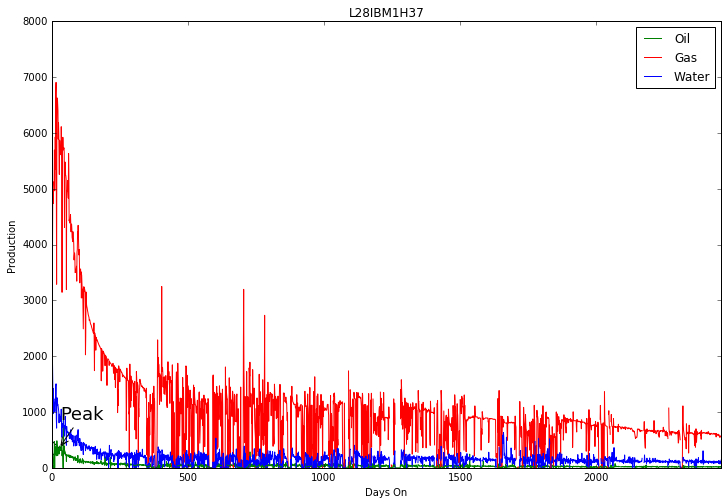

In [9]:
plot_production('L28IBM1H37', df_daily) # 2459 days production

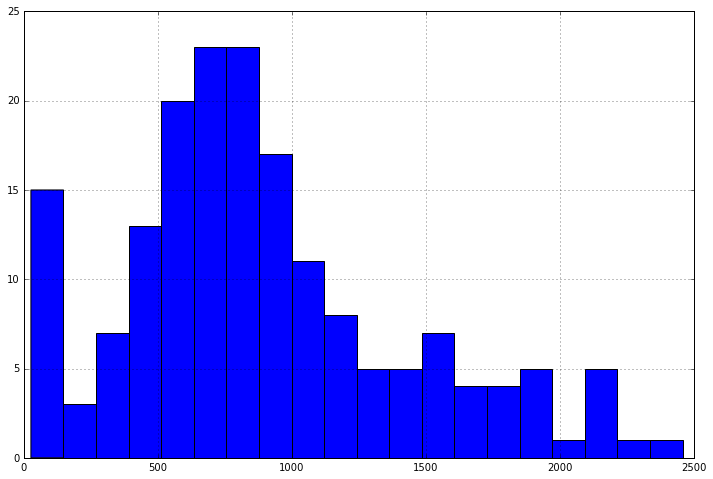

In [10]:
df['Days_Production'].hist(bins=20, figsize=(12,8))

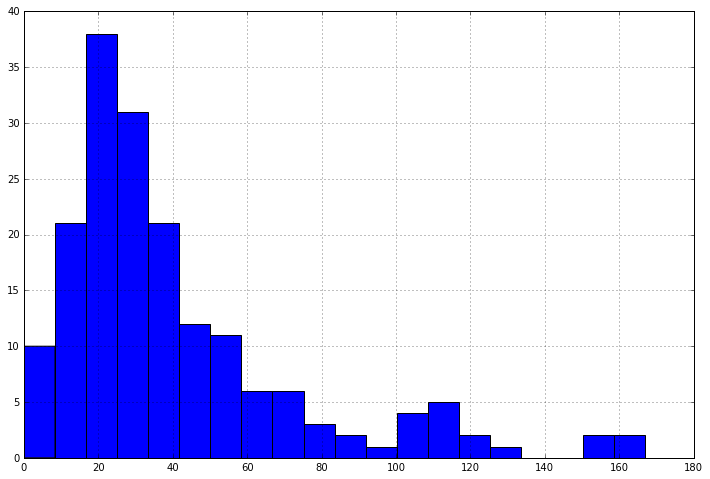

In [11]:
df['OIL_Days_to_Peak'].hist(bins=20, figsize=(12,8))

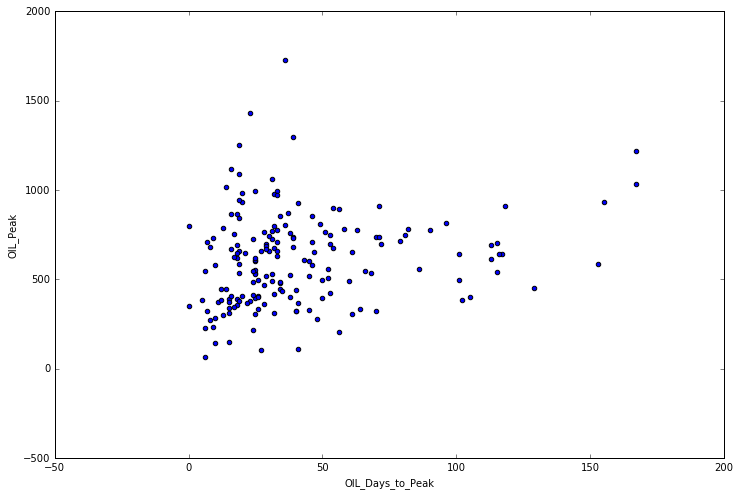

In [12]:
df.plot(x='OIL_Days_to_Peak', y='OIL_Peak', kind='scatter', figsize=(12,8))

In [13]:
df[df[u'OIL_Days_to_Peak'] > 100][[u'PROPNUM', u'Days_Production', u'OIL_Peak', u'OIL_Days_to_Peak']]

,PROPNUM,Days_Production,OIL_Peak,OIL_Days_to_Peak
31,NBTI44S27J,1419,385.321005,102
49,OATEQI8S27,1074,498.127716,101
58,P2IG4OAH5G,988,543.819726,115
85,OCLK2KJDBD,820,641.289499,101
98,PAML9LI0HK,694,691.969190,113
109,PAVGTJAB8R,666,932.671776,155
113,PC2KJ2MAGE,676,399.194017,105
115,PCMGS6EO33,643,642.126745,117
116,PCMHC2F247,643,642.670777,116
123,Q25H7O7J9P,610,616.615793,113


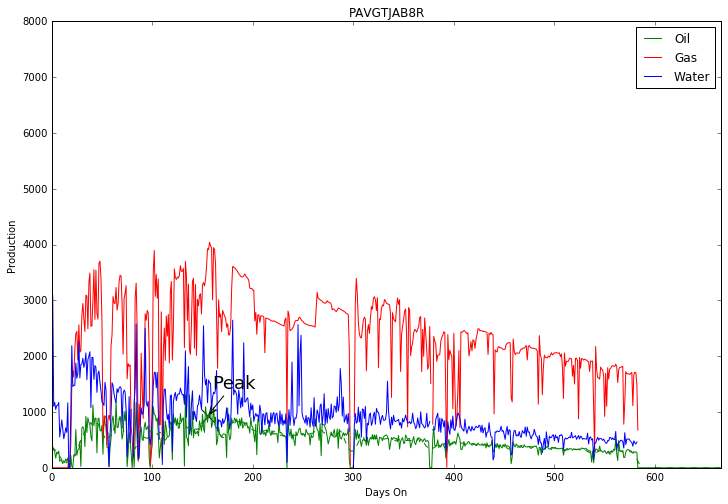

In [14]:
plot_production('PAVGTJAB8R', df_daily) # 155 days peak

In [98]:
df.groupby('XEC_FIELD')['XEC_FIELD'].count()

XEC_FIELD
COTTONWOOD DRAW    14
DIXIELAND          47
FORD, WEST         91
GRISHAM             9
PHANTOM             7
RED HILLS           1
STATELINE           3
TWO GEORGES         6
Name: XEC_FIELD, dtype: int64

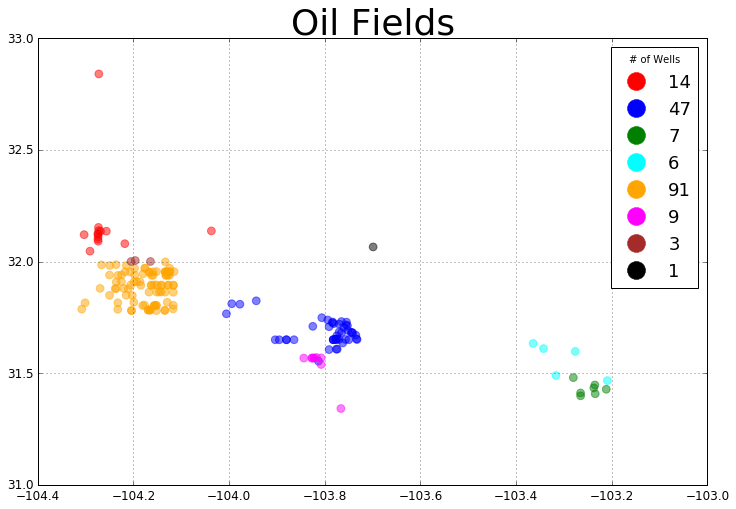

In [8]:
df_edit = df[df['PROPNUM'] != 'N5VG1S5H5I']
colors = {'COTTONWOOD DRAW':'red', 'DIXIELAND':'blue', 'PHANTOM':'green', 'TWO GEORGES':'cyan', 'FORD, WEST':'orange', 
          'GRISHAM':'magenta', 'STATELINE':'brown', 'RED HILLS':'black'}
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(df_edit['M_LONGITUDE'], df_edit['M_LATITUDE'], color=df_edit['XEC_FIELD'].apply(lambda x: colors[x]), s=60, 
           alpha=0.5)
ax.set_ylim([31.0, 33.0])
ax.grid()
c1 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="red", markeredgecolor='red', markersize=18)
c2 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue", markeredgecolor="blue", markersize=18)
c3 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green", markeredgecolor="green", markersize=18)
c4 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="cyan", markeredgecolor="cyan", markersize=18)
c5 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="orange", markeredgecolor="orange", markersize=18)
c6 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="magenta", markeredgecolor="magenta", markersize=18)
c7 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="brown", markeredgecolor="brown", markersize=18)
c8 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="black", markeredgecolor="black", markersize=18)
plt.title('Oil Fields', fontsize=36)
plt.legend((c1, c2, c3, c4, c5, c6, c7, c8),(14, 47, 7, 6, 91, 9, 3, 1),numpoints=1, loc=1, fontsize=18, 
           title='# of Wells')
font_size = 12
font_name = 'sans'
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    tick.label.set_fontname(font_name)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    tick.label.set_fontname(font_name)
# plt.savefig('../other/figures/oil_fields', dpi=400)


In [22]:
df.shape, df_edit.shape

((178, 46), (177, 46))

In [65]:
df.groupby('Reservoir')['Reservoir'].count()

Reservoir
Wolfcamp Shale A    89
Wolfcamp Shale C    14
Wolfcamp Shale D    75
Name: Reservoir, dtype: int64

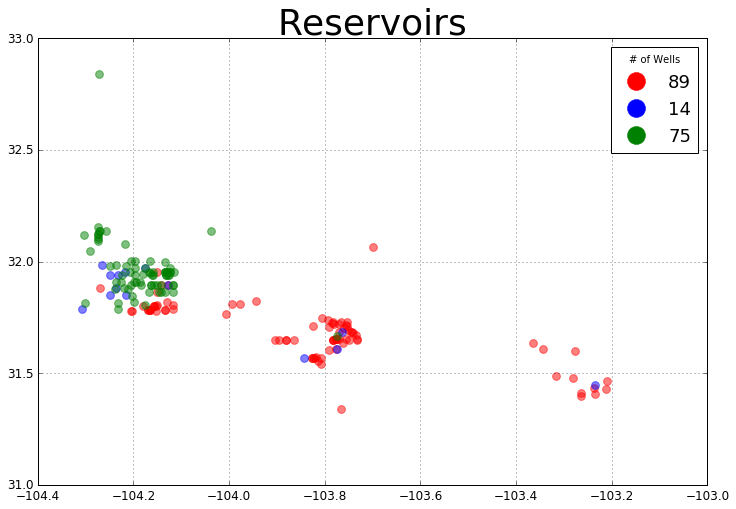

In [10]:
colors = {'Wolfcamp Shale A':'red', 'Wolfcamp Shale C':'blue', 'Wolfcamp Shale D':'green'}
wsa = df_edit[df_edit['Reservoir']=='Wolfcamp Shale A']
wsc = df_edit[df_edit['Reservoir']=='Wolfcamp Shale C']
wsd = df_edit[df_edit['Reservoir']=='Wolfcamp Shale D']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(wsa['M_LONGITUDE'], wsa['M_LATITUDE'], color='red', s=60, alpha=0.5)
ax.scatter(wsc['M_LONGITUDE'], wsc['M_LATITUDE'], color='blue', s=60, alpha=0.5)
ax.scatter(wsd['M_LONGITUDE'], wsd['M_LATITUDE'], color='green', s=60, alpha=0.5)
c1 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="red", markeredgecolor='red', markersize=18)
c2 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue", markeredgecolor="blue", markersize=18)
c3 = ml.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green", markeredgecolor="green", markersize=18)
ax.set_ylim([31.0, 33.0])
ax.grid()
plt.title('Reservoirs', fontsize=36)
plt.legend((c1, c2, c3),(89, 14, 75),numpoints=1, loc=1, fontsize=18, title='# of Wells')
font_size = 12
font_name = 'sans'
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    tick.label.set_fontname(font_name)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    tick.label.set_fontname(font_name)
# plt.savefig('../other/figures/reservoirs', dpi=400)


In [66]:
qc = df[(df['M_LATITUDE'] > 34.0) | ((df['M_LONGITUDE'] > -103.6) & (df['M_LONGITUDE'] < -103.4))]
[['PROPNUM', 'Reservoir', 'M_LONGITUDE', 'M_LATITUDE', 'XEC_FIELD']]
print qc

       PROPNUM         Reservoir  M_LONGITUDE  M_LATITUDE    XEC_FIELD
19  N5VG1S5H5I  Wolfcamp Shale D   -103.46430    31.63930   FORD, WEST
77  P62JB0RQ4U  Wolfcamp Shale A   -103.32336    34.49454  TWO GEORGES


In [67]:
qc.to_excel('../other/qc_table3.xlsx', index=False)